In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [85]:
NUM_CATEGORIES = 4

In [86]:
csv_files = glob.glob(f"data\\evolution-*")
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [87]:
# df = pd.read_csv("evolution.csv")

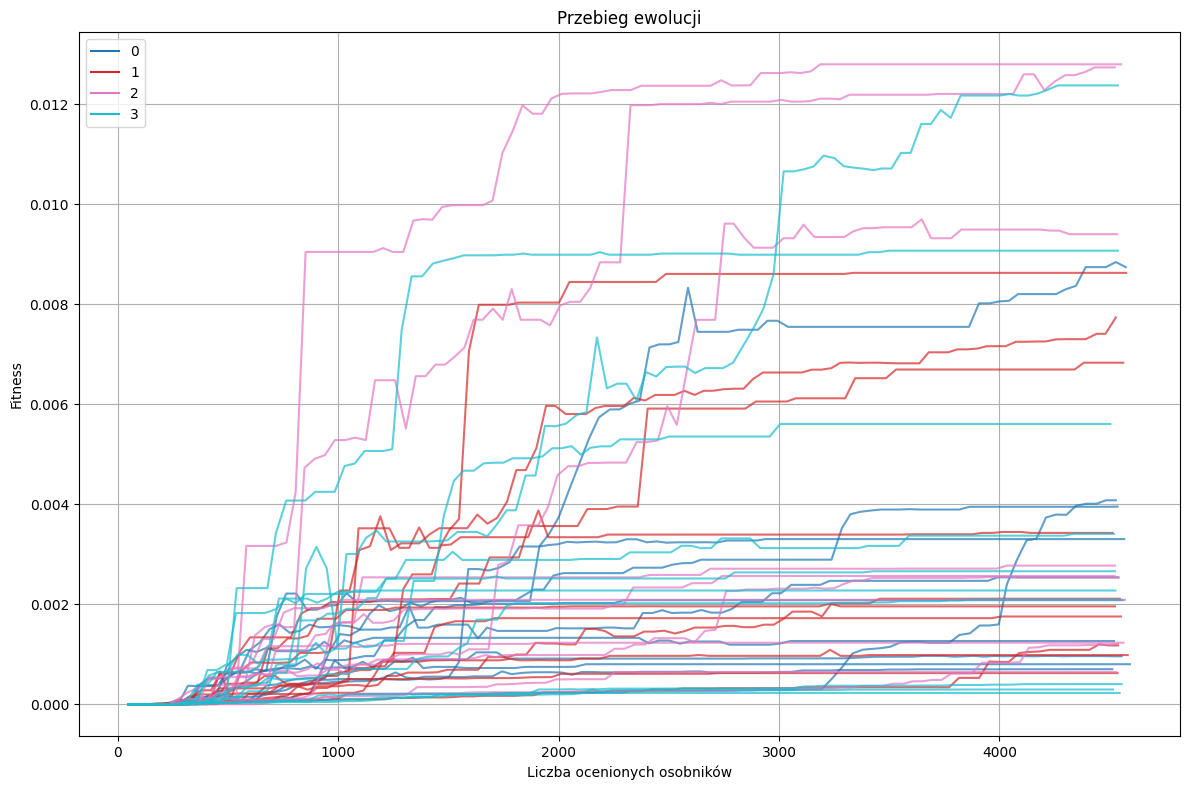

In [88]:
cmap = plt.cm.get_cmap('tab10', NUM_CATEGORIES)
colors = [cmap(i) for i in range(NUM_CATEGORIES)]
plt.figure(figsize=(12, 8))
for i, (wlasne_prawd_value, wlasne_prawd_runs_df) in enumerate(df.groupby('wlasne_prawd')):
    for run_index, run_df in wlasne_prawd_runs_df.groupby('run'):
        plt.plot(run_df['nevals'].cumsum(), run_df['max'], alpha=0.7, color=colors[i])
for i, (wlasne_prawd_value, wlasne_prawd_runs_df) in enumerate(df.groupby('wlasne_prawd')):
    plt.plot([], [], color=colors[i], label=f'{wlasne_prawd_value}')
plt.title('Przebieg ewolucji')
plt.xlabel('Liczba ocenionych osobników')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

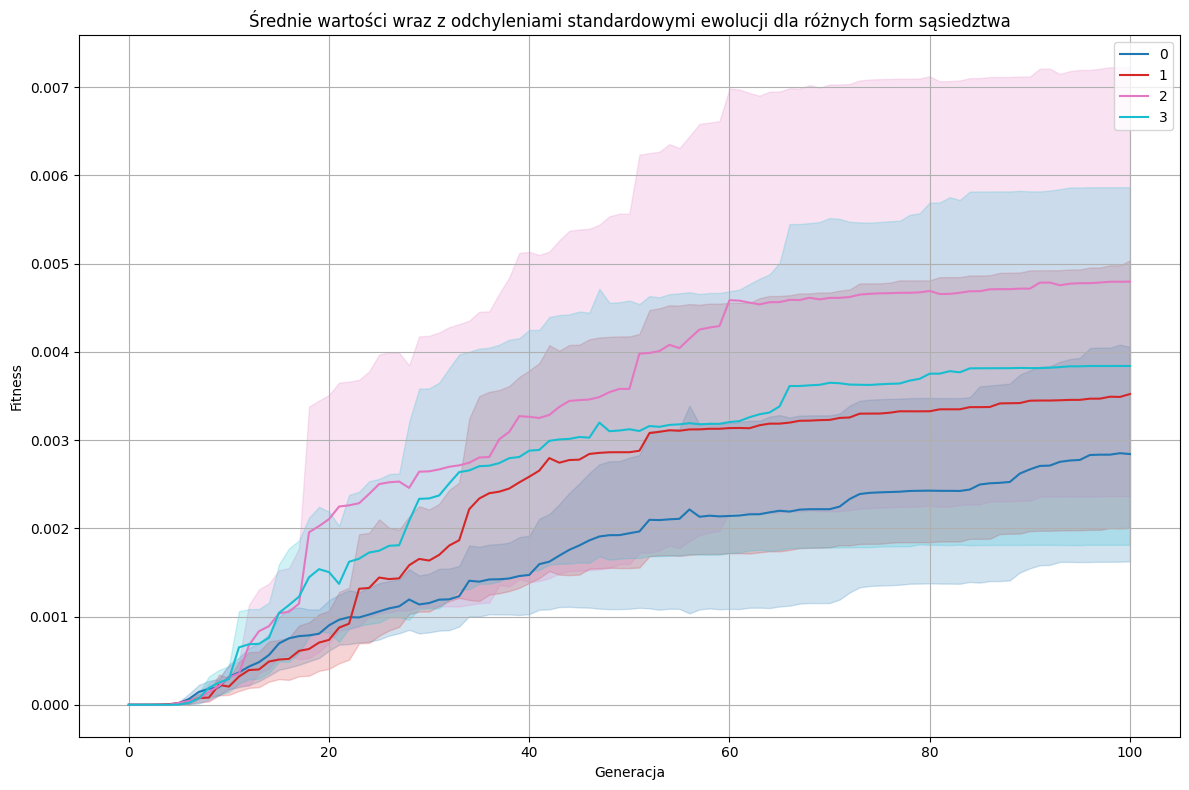

In [93]:
cmap = plt.cm.get_cmap('tab10', NUM_CATEGORIES)
colors = [cmap(i) for i in range(NUM_CATEGORIES)]
plt.figure(figsize=(12, 8))
for i, (wlasne_prawd_value, wlasne_prawd_runs_df) in enumerate(df.groupby('wlasne_prawd')):
    mean_values = wlasne_prawd_runs_df.groupby('gen')['max'].mean().values
    std_values = wlasne_prawd_runs_df.groupby('gen')['max'].std().values
    gen_values = wlasne_prawd_runs_df.groupby('gen')['max'].mean().index

    plt.plot(gen_values, mean_values, color=colors[i])
    plt.fill_between(gen_values, mean_values - std_values/2, mean_values + std_values/2, color=colors[i], alpha=0.2)
for i, (wlasne_prawd_value, wlasne_prawd_runs_df) in enumerate(df.groupby('wlasne_prawd')):
    plt.plot([], [], color=colors[i], label=f'{wlasne_prawd_value}')
plt.title('Średnie wartości wraz z odchyleniami standardowymi ewolucji dla różnych form sąsiedztwa')
plt.xlabel('Generacja')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
df.groupby('wlasne_prawd')

In [91]:
sorted(df['wlasne_prawd'].unique())

[0, 1, 2, 3]

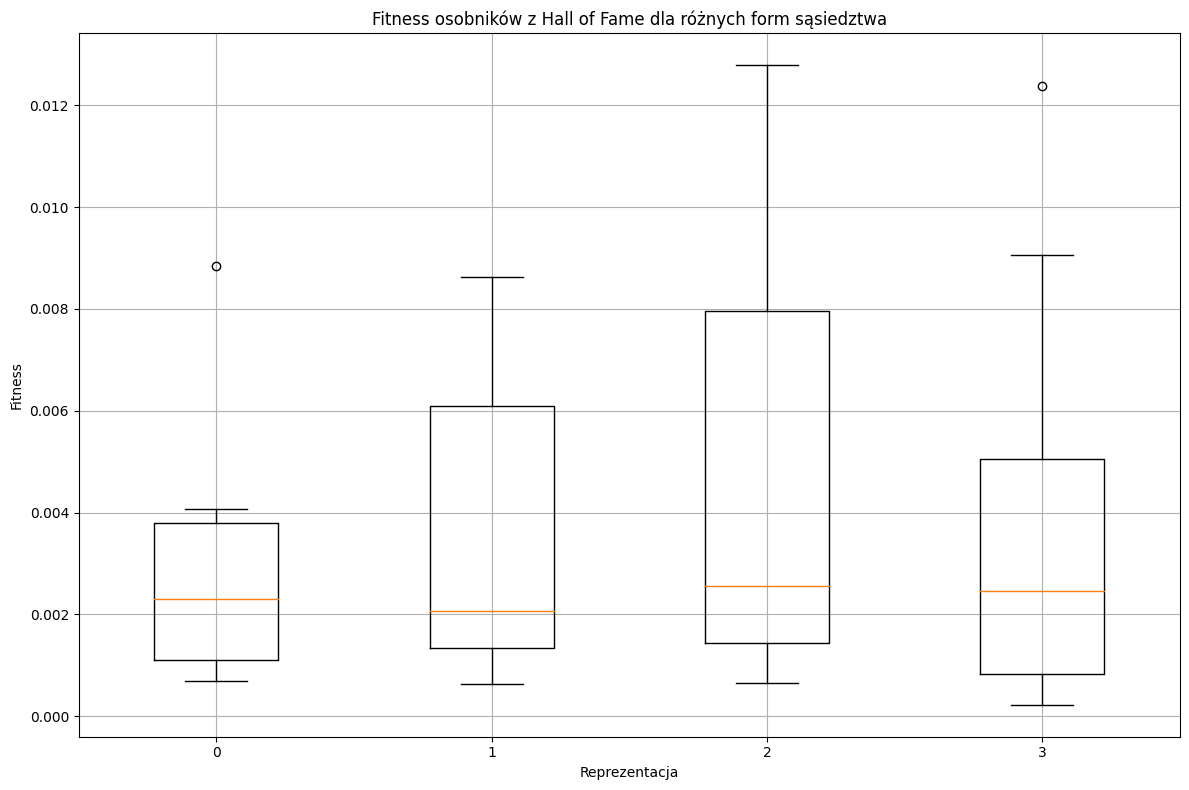

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create an empty list to store the data for each box plot
data = []
ticks = []

# Iterate over the grouped dataframe
for i, (wlasne_prawd_value, wlasne_prawd_runs_df) in enumerate(df.groupby('wlasne_prawd')):
    # Gather the max values for each run
    max_values = wlasne_prawd_runs_df.groupby('run')['max'].max().values
    ticks.append(wlasne_prawd_value)
    data.append(max_values)

# Create the box plots, with positions based on the index 'i'
plt.boxplot(data)

# Set x-axis labels for each box plot based on wlasne_prawd values
plt.xticks(range(1, len(ticks) + 1), ticks)
plt.title('Fitness osobników z Hall of Fame dla różnych form sąsiedztwa')
# Add axis labels
plt.xlabel('Reprezentacja')
plt.ylabel('Fitness')

# Display grid and adjust layout
plt.grid(True)
plt.tight_layout()
    
# Show the plot
plt.show()
